 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:title={'center':'Survival Count'}>

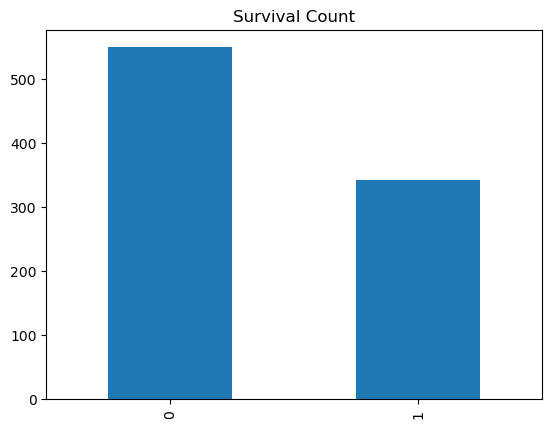

In [4]:
df['Survived'].value_counts().plot(kind='bar', title='Survival Count')

We can infer from here that majority of people did not survive the accident.

<AxesSubplot:title={'center':'Sex'}>

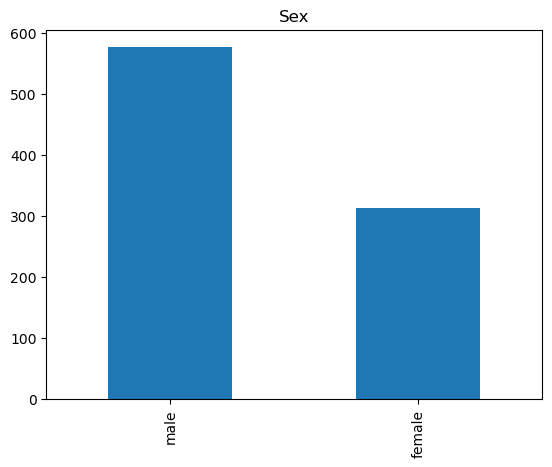

In [5]:
df['Sex'].value_counts().plot(kind='bar', title='Sex')

We can infer here that majority of people were male

<AxesSubplot:xlabel='Pclass', ylabel='count'>

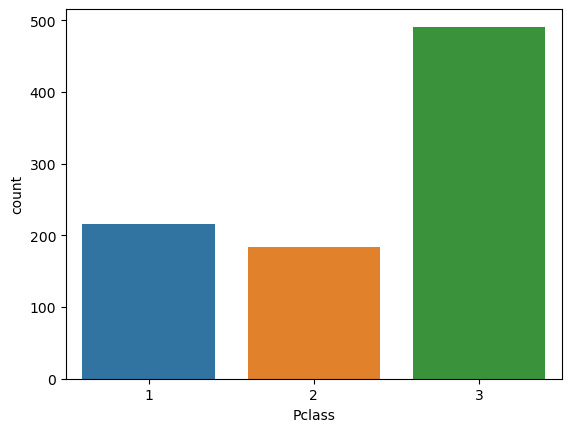

In [6]:
sns.countplot(df["Pclass"])

We can infer here that most people were in 3rd class followed by 1st class and 2nd class.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

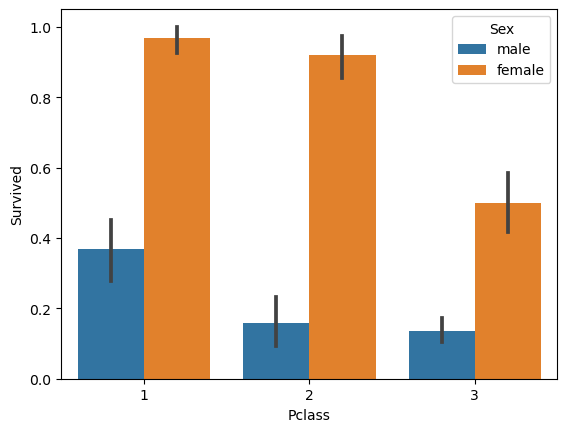

In [7]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=df)

We can infer here that in all the classes female survival rate is much higher than male survival rate and in all the three classes least males have survived in 3rd class.

<AxesSubplot:xlabel='Age', ylabel='Count'>

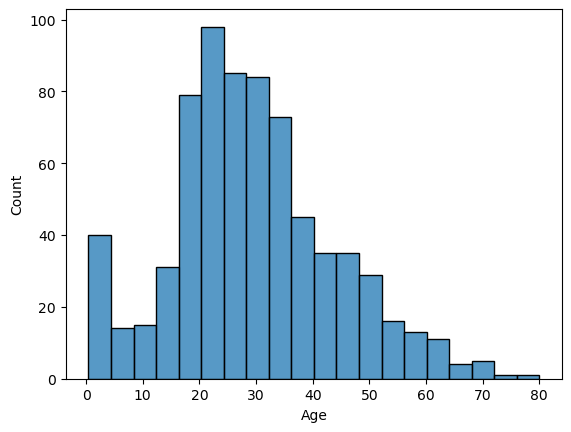

In [8]:
sns.histplot(df["Age"])

We can infer here that maximum people were of the age group 15-35

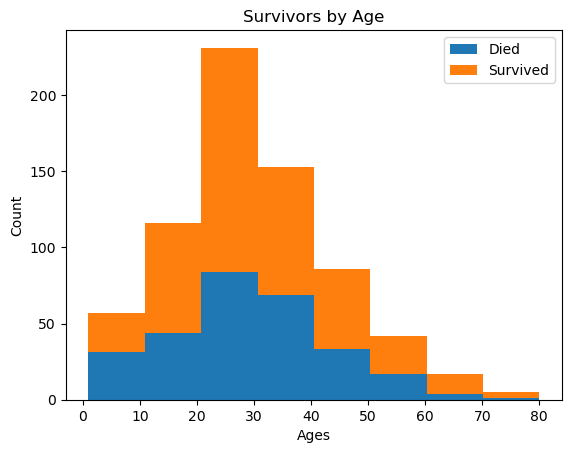

In [9]:
age_survived=df[df['Survived']==1]['Age']
age_not_survived = df[df['Survived'] == 0]['Age']
max_age=max(df['Age'])

plt.hist([age_survived,age_not_survived],bins=8,range=(1, max_age),stacked=True)
plt.title('Survivors by Age')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.legend(('Died', 'Survived'), loc='best')
plt.show()

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age cloumn has null values, we will use median of age column to replace null values. The median will be taken according to their sex and passenger class.

In [12]:
df['Age']=df['Age'].groupby([df['Sex'],df['Pclass']]).apply(lambda x: x.fillna(x.median()))

In [13]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Cabin column has a lot of null values which can not be filled and has no impact on the output, so we will drop Cabin column

In [14]:
df["Cabin"].nunique()

147

In [15]:
df.drop(["Cabin"],axis=1, inplace=True)

Now only Embarked column has two null values so we will remove the rows which have null values.

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Encoding the data--- Changing categorical columns - Sex, Pclass and Embarked to binary values using one hot encoder

In [18]:
ohe=OneHotEncoder()
x=df[["Embarked","Sex","Pclass"]].values
x=ohe.fit_transform(x).toarray()
y=z=np.hstack(ohe.categories_)
merge= pd.DataFrame(data=x,columns=y)
df_n=pd.concat([df,merge],axis=1)
df_n

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S,female,male,1,2,3
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1.0,2.0,W./C. 6607,23.4500,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0000,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
890,891.0,0.0,3.0,"Dooley, Mr. Patrick",male,32.0,0.0,0.0,370376,7.7500,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


Creating a final dataframe for machine learning removing all the unnecessary columns and whose attributes are already present.

In [19]:
df_n.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked","C","female",2] ,axis=1, inplace=True)

In [20]:
df_n.dropna(inplace=True)

In [21]:
df_n

,Survived,Age,SibSp,Parch,Fare,Q,S,male,1,3
0,0.0,22.0,1.0,0.0,7.2500,0.0,1.0,1.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,1.0,0.0
2,1.0,26.0,0.0,0.0,7.9250,0.0,1.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,1.0,0.0,1.0,0.0
4,0.0,35.0,0.0,0.0,8.0500,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
884,0.0,25.0,0.0,0.0,7.0500,0.0,1.0,1.0,0.0,0.0
885,0.0,39.0,0.0,5.0,29.1250,0.0,1.0,0.0,1.0,0.0
886,0.0,27.0,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,1.0
887,1.0,19.0,0.0,0.0,30.0000,0.0,0.0,1.0,1.0,0.0


In [22]:
df_n.isnull().sum()

Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
Q           0
S           0
male        0
1           0
3           0
dtype: int64

In [23]:
df_n.dtypes

Survived    float64
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Q           float64
S           float64
male        float64
1           float64
3           float64
dtype: object

As all the values in the final Dataframe is in float, no need to remove any empty spaces

Removing Outliers

In [24]:
z=np.abs(zscore(df_n))
dfn=df_n[(z<3).all(axis=1)]
dfn

,Survived,Age,SibSp,Parch,Fare,Q,S,male,1,3
0,0.0,22.0,1.0,0.0,7.2500,0.0,1.0,1.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,1.0,0.0
2,1.0,26.0,0.0,0.0,7.9250,0.0,1.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,1.0,0.0,1.0,0.0
4,0.0,35.0,0.0,0.0,8.0500,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
881,0.0,33.0,0.0,0.0,7.8958,0.0,1.0,1.0,0.0,0.0
882,0.0,22.0,0.0,0.0,10.5167,0.0,1.0,1.0,0.0,1.0
884,0.0,25.0,0.0,0.0,7.0500,0.0,1.0,1.0,0.0,0.0
886,0.0,27.0,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,1.0


887-816=71, SO lost less than 10% of the data while removing outliers which is acceptable

In [25]:
#Checking skewness
df_n.skew()

Survived    0.485726
Age         0.532037
SibSp       3.686760
Parch       2.741198
Fare        4.796347
Q           2.940028
S          -1.002710
male       -0.621985
1           1.218755
3          -0.215810
dtype: float64

In [26]:
#trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
#dfn1 = trans.fit_transform(dfn)

Applying transformations on columns with skewness more than 0.5 on non categorical columns

In [27]:
dfn["SibSp"]=np.cbrt(dfn["SibSp"])
dfn["Parch"]=np.cbrt(dfn["Parch"])
dfn["Fare"]=np.power(dfn["Fare"],0.25)

In [28]:
dfn.skew()

Survived    0.479810
Age         0.409213
SibSp       0.932833
Parch       1.581880
Fare        0.086297
Q           0.000000
S          -1.437181
male       -0.636778
1           1.066287
3          -0.072874
dtype: float64

Skewness can not be removed anymore so proceeding with the dataset.

<AxesSubplot:>

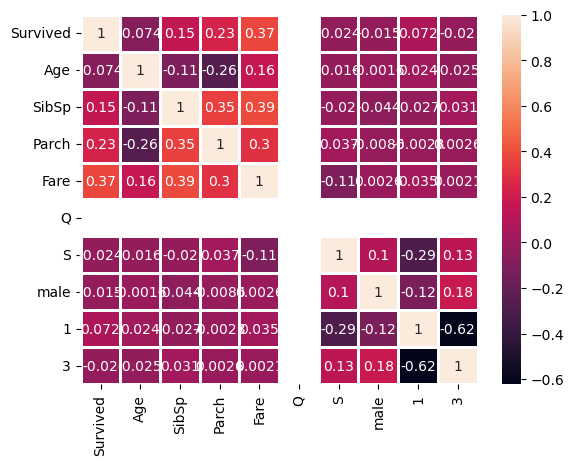

In [29]:
# To find multicolinearity
dfc=dfn.corr()
sns.heatmap(dfc, annot= True, linewidths=0.75)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(df_n.iloc[:,:-1].values,i) for i in range(df_n.iloc[:,:-1].shape[1])]
vif["features"]=df_n.iloc[:,:-1].columns
print(vif)

   VIF Factor  features
0    1.697776  Survived
1    4.064714       Age
2    1.505831     SibSp
3    1.543203     Parch
4    1.679666      Fare
5    1.306514         Q
6    3.542582         S
7    2.614765      male
8    1.337304         1


Dimensionality Reduction-- testing using ANOVA

In [31]:
a=[]
for i in dfn.columns:
    for j in dfn.columns:
        try:
            F, p = stats.f_oneway(dfn[f'{j}'],dfn[f'{i}'])
           # print(f"relation of {j} with {i}","\n","F =",F,"p=",p)
            if p>0.05 and p!=1:
                a.append(f"relation of {j} with {i} F = {F} and p= {p}")
        except:
            F, p = stats.f_oneway(dfn[{j}],dfn[{i}])
            if p>0.05 and p!=1:
                a.append(f"relation of {j} with {i} F = {F} and p= {p}")
            
            #print(f"relation of {j} with {i}","\n","F =",F,"p=",p)
    
            
a

[]

No columns have relational value of p more than 0.05, so ANOVA test is passed.

 to handle Imbalanced Data we will use SMOTE

In [32]:
dfn.describe()

,Survived,Age,SibSp,Parch,Fare,Q,S,male,1,3
count,743.000000,743.000000,743.000000,743.000000,743.000000,743.0,743.000000,743.000000,743.000000,743.000000
mean,0.383580,29.084347,0.318715,0.215688,2.059005,0.0,0.791386,0.651413,0.265141,0.518170
std,0.486585,12.466401,0.488648,0.438068,0.553972,0.0,0.406591,0.476844,0.441706,0.500006
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.500000,0.000000,0.000000,1.676290,0.0,1.000000,0.000000,0.000000,0.000000
50%,0.000000,26.000000,0.000000,0.000000,1.898829,0.0,1.000000,1.000000,0.000000,1.000000
75%,1.000000,36.000000,1.000000,0.000000,2.294571,0.0,1.000000,1.000000,1.000000,1.000000
max,1.000000,66.000000,1.442250,1.259921,3.583301,0.0,1.000000,1.000000,1.000000,1.000000


0.0    458
1.0    285
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

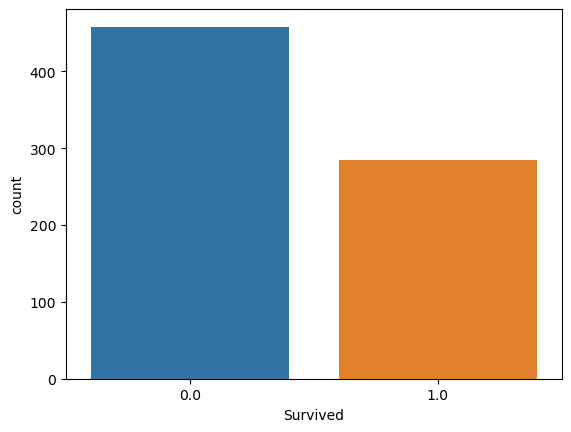

In [33]:
print(dfn["Survived"].value_counts())
sns.countplot(dfn["Survived"])

0.0    458
1.0    458
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

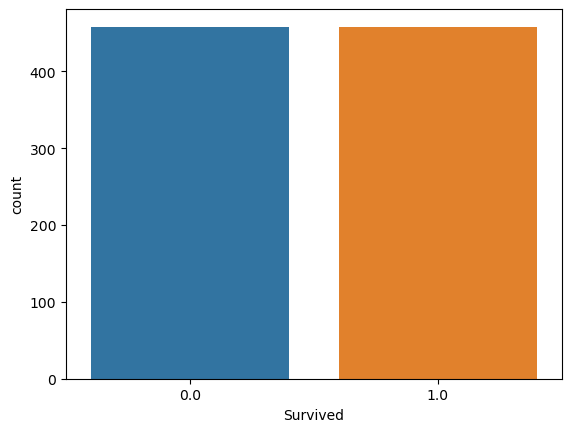

In [34]:
#Oversampling the data
dfy=dfn["Survived"]
dfx=dfn.iloc[:,1:]
smt=SMOTE()
trainx, trainy=smt.fit_resample(dfx,dfy)
print(trainy.value_counts())
sns.countplot(trainy)

In [35]:
dfx

,Age,SibSp,Parch,Fare,Q,S,male,1,3
0,22.0,1.0,0.0,1.640909,0.0,1.0,1.0,0.0,1.0
1,38.0,1.0,0.0,2.905674,0.0,0.0,0.0,1.0,0.0
2,26.0,0.0,0.0,1.677837,0.0,1.0,0.0,0.0,1.0
3,35.0,1.0,0.0,2.699440,0.0,1.0,0.0,1.0,0.0
4,35.0,0.0,0.0,1.684414,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
881,33.0,0.0,0.0,1.676290,0.0,1.0,1.0,0.0,0.0
882,22.0,0.0,0.0,1.800818,0.0,1.0,1.0,0.0,1.0
884,25.0,0.0,0.0,1.629473,0.0,1.0,1.0,0.0,0.0
886,27.0,0.0,0.0,1.898829,0.0,1.0,0.0,0.0,1.0


Scaling of Independent features

In [36]:
st=StandardScaler()
x=st.fit_transform(trainx)
finalx=pd.DataFrame(data=x, columns=trainx.columns)

In [37]:
finalx

,Age,SibSp,Parch,Fare,Q,S,male,1,3
0,-0.511724,1.396500,-0.534503,-0.835790,0.0,0.534917,0.748440,-0.633605,1.003878
1,0.746826,1.396500,-0.534503,1.482821,0.0,-1.937867,-1.404921,1.630040,-1.019177
2,-0.197086,-0.674635,-0.534503,-0.768092,0.0,0.534917,-1.404921,-0.633605,1.003878
3,0.510848,1.396500,-0.534503,1.104744,0.0,0.534917,-1.404921,1.630040,-1.019177
4,0.510848,-0.674635,-0.534503,-0.756034,0.0,0.534917,0.748440,-0.633605,1.003878
...,...,...,...,...,...,...,...,...,...
911,-0.275746,-0.674635,-0.534503,-0.784916,0.0,-1.637991,-1.143782,-0.633605,1.003878
912,-0.551053,-0.674635,-0.534503,-0.786779,0.0,-1.432254,0.748440,1.167190,-1.019177
913,-2.163569,-0.525090,2.203669,-0.214251,0.0,0.534917,0.748440,-0.633605,1.003878
914,0.589507,0.602519,2.245073,1.937578,0.0,0.534917,-0.077063,-0.633605,1.003878


Now we check the accuracy of our databy training with 80% of our data and testing on rest 20%

In [38]:
# Split 80-20 train vs test data
train_x,test_x,train_y,test_y=train_test_split(finalx,trainy,test_size=0.2,random_state=15)

In [39]:
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(732, 9) (732,)
(184, 9) (184,)


Training and testing of data in various models.

In [40]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

accuracy score for  LogisticRegression() is :  0.75 
 [[76 15]
 [31 62]] 
               precision    recall  f1-score   support

         0.0       0.71      0.84      0.77        91
         1.0       0.81      0.67      0.73        93

    accuracy                           0.75       184
   macro avg       0.76      0.75      0.75       184
weighted avg       0.76      0.75      0.75       184
 

Cross Validation Score is : [0.62585034 0.75510204 0.63013699 0.67123288 0.73972603]
Mean Score : 0.6844096542726679


accuracy score for  GaussianNB() is :  0.717391304347826 
 [[73 18]
 [34 59]] 
               precision    recall  f1-score   support

         0.0       0.68      0.80      0.74        91
         1.0       0.77      0.63      0.69        93

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.72      0.72      0.72       184
 

Cross Validation Score is : [0.63265306 0.70068027 0.59589041 0.6712

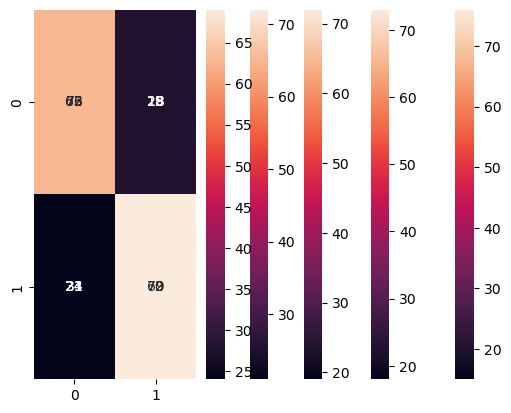

In [41]:
model=[lg,gnb,svc,dtc,knn]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print("accuracy score for ",m,"is : ",accuracy_score(test_y,predm),"\n",confusion_matrix(test_y,predm),"\n",classification_report(test_y,predm),"\n")
    sns.heatmap(confusion_matrix(test_y,predm),annot=True)
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("==============================================\n\n\n====================================================")

Best accuracy and CV score is given by SVC model. So we will proceed with that.

In [42]:
from sklearn.model_selection import GridSearchCV
dict1={"kernel":["poly","rbf","linear"]}
gv=GridSearchCV(estimator=svc,param_grid=dict1,cv=5, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'kernel': 'rbf'}

so we will use rbf as kernel

In [43]:
sv=SVC(kernel="rbf")
sv.fit(train_x,train_y)
pred1=sv.predict(test_x)
accuracy_score(test_y,pred1)

0.7717391304347826

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
ran=[]
for i in range(50):
    ran.append(i)
    
dict2={"random_state":ran}
gv=GridSearchCV(rf,dict2, refit=True)
gv.fit(train_x,train_y)
gv.best_params_



{'random_state': 23}

As the best parameter for random state is 15, we will try random forest classifier with this parameter

In [45]:
rf1=RandomForestClassifier(random_state=15)
rf1.fit(train_x,train_y)
prf=rf1.predict(test_x)
accuracy_score(test_y,prf)

0.8315217391304348

In [46]:
score=cross_val_score(rf1,train_x,train_y,cv=5)
print("Cross Validation Score is :",score.mean())

Cross Validation Score is : 0.7281241263628739


This is the best result so we will save this model

In [47]:
import joblib

In [48]:
joblib.dump(rf1,"titrfc.obj")

['titrfc.obj']

In [49]:
def predict(inplist):
    inp=np.array(inplist)
    i=inp.reshape(1,-1)
    res=rf1.predict(i)
    print(res)
    if res==0:
        print("The passenger Dies")
    else:
        print("The Passenger Lives")

In [50]:
#to enter values one by one, run this
inplist=[]

vari=["Age","SibSp","Parch","Fare","Embarked","Sex","Passenger Class"]
for v in vari:
    
    if v=="Embarked":
            n=(input(f"enter the value for {v} :  "))
            if n=="C":
                inplist.append(0)
                inplist.append(0)
            if n=="Q":
                inplist.append(1)
                inplist.append(0)
            else:
                inplist.append(0)
                inplist.append(1)
            continue
    if v=="Sex":
        n=(input(f"enter the value for {v} as M or F:  "))
        if n=="M":
            inplist.append(1)
        if n=="F":
            inplist.append(0)
        continue
    if v=="Passenger Class":
        n=(input(f"enter the value for {v} as 1,2,3 :  "))
        if n=="1":
            inplist.append(1)
            inplist.append(0)
        if n=="2":
            inplist.append(0)
            inplist.append(0)
        else:
            inplist.append(0)
            inplist.append(1)
        continue
    else:
        n=float(input(f"enter the value for {v} :  "))
        inplist.append(n)
    
    
    
predict(inplist)

enter the value for Age :  26
enter the value for SibSp :  0
enter the value for Parch :  0
enter the value for Fare :  3101282
enter the value for Embarked :  S
enter the value for Sex as M or F:  F
enter the value for Passenger Class as 1,2,3 :  3
[1.]
The Passenger Lives
